# CREDIT CARD CUSTOMER APPROVAL PREDICTION

### DONE BY :

 DIVYA REDDY RAVIPATI
 

ABSTRACT:
    The present research endeavors to tackle the crucial undertaking of credit card client acceptance in the banking sector by        employing sophisticated machine learning methodologies
    to construct a predictive model.
    The approach improves decision-making, lowers human bias, and raises overall accuracy in credit approval processes through       the analysis of historical data. 
    The process entails a thorough analysis of previous credit card applications to use prediction algorithms to find important     signs and minute relationships.
    To reduce the biases, present in human decision-making, the model changes and grows over time by learning from data. 
    The main goal is to increase the accuracy of credit approval processes, making it easier to identify applicants
    who pose a danger or who are not. Through its exploration of cutting-edge technology in credit risk assessment,
    the research helps to create more dependable and efficient credit evaluation procedures.
    In the ever-changing world of finance, By examining innovative technologies in credit risk assessment, the research advances     more dependable and efficient credit evaluation procedures. 
    This research provides valuable insights to strengthen credit approval systems in the ever-changing financial world, 
    so they can continue to be resilient, flexible, and sensitive to changing market conditions.
    Providing the financial sector with tools that expedite procedures while promoting justice, accuracy, and flexibility is the     ultimate objective.

INTRODUCTION:
The review and acceptance of credit card applications are critical procedures that have a significant impact on financial organizations 
as well as individual customers in the complex world of finance.
By utilizing cutting-edge machine learning techniques, this research aims to herald in a new age 
by building a predictive model particularly intended for credit card client acceptance. 
This model is based on a thorough examination of large amounts of historical data combined with the use of advanced forecasting algorithms. 
The model, in contrast to conventional credit evaluation techniques, aims to go beyond static criteria by adjusting to dynamic patterns and changing trends in the data.[2]
The goal of this research is to improve decision-making processes, which is made possible by the model's capacity to identify minute connections and learn from past data. 
This flexibility not only improves the accuracy of credit assessments but also tackles the innate prejudices that are frequently linked to human judgment in conventional systems. 
The main goal is to advance credit approval systems' development so that they can identify possible hazards and creditworthy applicants more accurately, increasing their efficiency.
As we enter the age of technological innovation, the research also explores how cutting-edge technologies are applied to address the difficulties inherent in credit risk assessment. 
The study aims to strengthen credit evaluation procedures by embracing the most recent advancements, 
making sure they are flexible and durable in the face of quickly shifting market conditions. [3]
The study's conclusions are intended to give financial institutions practical tools that will simplify credit approval procedures 
and promote a future where people can navigate the intricacies of the contemporary financial environment with fairness, accuracy, and flexibility.


LITERATURE REVIEW:
For banks, it's critical to predict whether a credit card application will be accepted
 Much work has been done in this area, employing various techniques to ensure that the models we employ are capable of accurately determining whether a borrower is likely to repay their loan. In the past, we largely used financial information, such as age and salary, for this. However, in order to improve our forecasting, we are now utilizing more sophisticated computer tools.
Explanatory AI (XAI) is another exciting development. This aids in our comprehension of the decision-making process of these intricate computer models. It's crucial because, particularly in the banking industry, we must be able to provide an explanation for a credit card applicant's approval or denial. By providing humans with insights into these computer models, XAI approaches make them more comprehensible and transparent.[4]
Combining many models has also gained popularity. Researchers are mixing many techniques of prediction instead of depending on just one. We refer to this process as ensemble learning, and it improves the accuracy of our forecasts. It's similar to gathering diverse viewpoints to improve decision-making.
Another area of study being conducted by researchers is feature engineering. Rather of relying just on the standard parameters, they are investigating novel variables. These may include information from non-traditional sources, which is something we hadn't previously considered. We aim to improve the strength and predictive power of the models by experimenting with different feature combinations.[5]
In conclusion, there is constant change in the study on credit card approval prediction. These days, we're thinking beyond the obvious, utilizing cutting-edge AI strategies, mixing and matching approaches, and investigating novel angles. Accurate models that are also simple to comprehend and modify in response to changes in the financial industry are the aim. In order to make sure that choices concerning who receives a credit card are fair and well-informed, it is imperative that this field of study be up to date with the most recent trends and difficulties


DATA COLLECTION :
When it comes to gathering information about credit card transactions and applicants, the data collection process is multi-faceted and varies based on the data's origin and purpose. Platforms like Kaggle, known for predictive modeling and analytics competitions, serve as hubs where credit card-related datasets are sourced. These datasets can originate from diverse channels such as financial institutions, credit bureaus, or specially crafted datasets designed for specific challenges on the Kaggle platform.

Essential to this process are two key CSV files: the Credit Card Record and the Application Record. The former meticulously logs individual credit card transactions, detailing transaction dates, amounts, merchant information, and any flags denoting noteworthy indicators. Conversely, the Application Record file delves into the details of individuals applying for credit cards, encompassing personal information like names, ages, genders, financial specifics such as income and expenses, and a snapshot of their credit history.

The amalgamation and consolidation of data from these files lay a foundational framework for subsequent analyses and predictive modeling. This comprehensive dataset facilitates a holistic understanding of both credit card transactions and the profiles of individuals seeking credit. The cyclical process of exploring the data, refining features, and training models ensures that the resulting insights and predictive models align closely with the intricate dynamics of credit card-related behaviors and risks. In essence, this systematic approach to data collection serves as the bedrock for making well-informed decisions within the financial landscape.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTENC, SMOTEN
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier

In [2]:
df= pd.read_csv("application_record.csv", encoding = 'utf-8') 
df_credit = pd.read_csv("credit_record.csv", encoding = 'utf-8')  

In [142]:
print('The first table shows the quantity of distinct customer IDs.',df['ID'].nunique())
print('The amount of unique customer IDs for the second table',df_credit['ID'].nunique())
print('The quantity of unique customer IDs that are included in both tables:',df[df['ID'].isin(df_credit['ID'])]['ID'].nunique())

The first table shows the quantity of distinct customer IDs. 438510
The amount of unique customer IDs for the second table 45985
The quantity of unique customer IDs that are included in both tables: 36457


In [143]:
# Remove all non-useful samples.
df = df[df['ID'].isin(df_credit['ID'])]
df_credit = df_credit[df_credit['ID'].isin(df['ID'])]

In [144]:
#create a label
def label_bad(df):
    if (df["STATUS"]=='3') | (df["STATUS"]=='4') | (df["STATUS"]=='5'): # bad
        return 2
    elif (df["STATUS"]=='X'): # no record
        return -1
    elif (df["STATUS"]=='0') | (df["STATUS"]=='1') | (df["STATUS"]=='2'): # indeterminates
        return 1
    else:
        return 0

In [145]:
df_credit["MONTHS_BALANCE"] = -df_credit["MONTHS_BALANCE"]
df_credit = df_credit[df_credit["MONTHS_BALANCE"]<=12]
df_credit["Bad_Customer"] = df_credit.apply(label_bad, axis=1)

In [146]:
df_credit_labeled = df_credit[['ID','Bad_Customer',"MONTHS_BALANCE"]].groupby('ID',as_index=False).max()

In [147]:
# delete a customer who merely has the X status (no use information) (marked with a -1)
df_credit_labeled = df_credit_labeled[df_credit_labeled['Bad_Customer']!=-1]
# eliminate the unidentified customer (labelled as 1)
df_credit_labeled = df_credit_labeled[df_credit_labeled['Bad_Customer']!=1]
# delete customers whose records have been open for fewer than a year.
df_credit_labeled = df_credit_labeled[df_credit_labeled['MONTHS_BALANCE']==12]
# Instead, tag Bad_customer as 1 (former = 2).
df_credit_labeled['Bad_Customer'] = (df_credit_labeled['Bad_Customer']/2).apply(np.int32)
df_credit_labeled =  df_credit_labeled.drop('MONTHS_BALANCE', axis=1)

In [148]:
# merge label
df_labeled = df.merge(df_credit_labeled,on='ID',how='inner')

In [149]:
df_labeled.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Bad_Customer
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
3,5008826,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,0
4,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0,0
5,5008832,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0,0
6,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10968,-1620,1,0,0,0,NaN,2.0,0
7,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,-12689,-1163,1,0,0,0,Laborers,5.0,0
8,5008837,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,-12689,-1163,1,0,0,0,Laborers,5.0,0
9,5008840,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,Managers,3.0,0


In [150]:
df_labeled = df_labeled.drop('ID',axis=1)

In [151]:
# Verify if different card holders have labels that indicate good or bad or mix
print('Quantity of redundant data with incorrect customer labeling: ', df_labeled.duplicated().sum())
print('Quantity of redundant data with accurate customer labeling: ', df_labeled.drop('Bad_Customer',axis=1).duplicated().sum())

Quantity of redundant data with incorrect customer labeling:  5271
Quantity of redundant data with accurate customer labeling:  5313


In [152]:
# Flag duplicate information that come from the same customer
df_labeled['ID_same_customer'] = df_labeled.groupby(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'], dropna=False).ngroup()


In [153]:
#Combine data so that there is only one for every client. If more than one ID is marked as bad_customer, the bad_customer tag value is 1.
df_labeled = df_labeled.groupby(['ID_same_customer','CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],as_index=False,dropna=False).max()

In [154]:
# Verify the duplicate data once more.

df_labeled.drop('ID_same_customer',axis=1).duplicated().sum()

0

In [155]:
df_labeled.isna().sum()/df.shape[0]*100

ID_same_customer       0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.000000
FLAG_MOBIL             0.000000
FLAG_WORK_PHONE        0.000000
FLAG_PHONE             0.000000
FLAG_EMAIL             0.000000
OCCUPATION_TYPE        4.226897
CNT_FAM_MEMBERS        0.000000
Bad_Customer           0.000000
dtype: float64

Text(0.5, 1.0, 'Customer income category without occupation information')

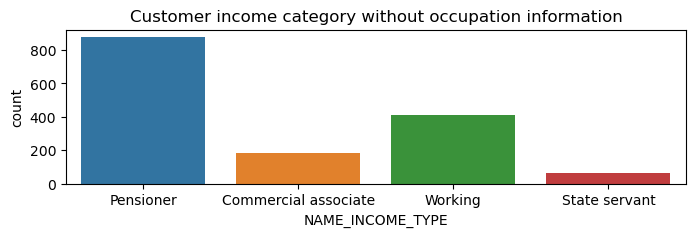

In [156]:
plt.figure(figsize=(8,2))
sns.countplot(x= df_labeled[df_labeled["OCCUPATION_TYPE"].isna()]["NAME_INCOME_TYPE"])
plt.title("Customer income category without occupation information")

In [157]:
#label kind of pensioner occupation
df_labeled.loc[df_labeled["NAME_INCOME_TYPE"]=="Pensioner","OCCUPATION_TYPE"] = "Pensioner"

In [158]:
# After allocating a pensioner, check the missing data.
df_labeled.isna().sum()/df.shape[0]*100

ID_same_customer       0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.000000
FLAG_MOBIL             0.000000
FLAG_WORK_PHONE        0.000000
FLAG_PHONE             0.000000
FLAG_EMAIL             0.000000
OCCUPATION_TYPE        1.818581
CNT_FAM_MEMBERS        0.000000
Bad_Customer           0.000000
dtype: float64

In [159]:
# remove rows with null occupations

df_labeled = df_labeled.dropna(axis=0)

In [160]:
df_labeled["CODE_GENDER"].unique()

array(['F', 'M'], dtype=object)

In [161]:
df_labeled["FLAG_OWN_CAR"].unique()

array(['N', 'Y'], dtype=object)

In [162]:
df_labeled["FLAG_OWN_REALTY"].unique()

array(['N', 'Y'], dtype=object)

In [163]:
df_labeled["NAME_INCOME_TYPE"].unique()

array(['Working', 'Pensioner', 'State servant', 'Commercial associate',
       'Student'], dtype=object)

In [164]:
df_labeled["NAME_FAMILY_STATUS"].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Widow',
       'Separated'], dtype=object)

In [165]:
df_labeled["NAME_HOUSING_TYPE"].unique()

array(['House / apartment', 'Office apartment', 'With parents',
       'Municipal apartment', 'Co-op apartment', 'Rented apartment'],
      dtype=object)

In [166]:
df_labeled["OCCUPATION_TYPE"].unique()

array(['Managers', 'Pensioner', 'Core staff', 'Accountants',
       'Sales staff', 'Cleaning staff', 'Medicine staff', 'Laborers',
       'Security staff', 'High skill tech staff', 'Cooking staff',
       'Private service staff', 'Waiters/barmen staff', 'Secretaries',
       'HR staff', 'Low-skill Laborers', 'Drivers', 'IT staff',
       'Realty agents'], dtype=object)

In [167]:
#drop gender

df_labeled = df_labeled.drop("CODE_GENDER", axis=1)

In [168]:
df_labeled.head()

,ID_same_customer,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Bad_Customer
0,0,N,N,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,0
1,1,N,N,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,365243,1,0,0,0,Pensioner,2.0,0
2,2,N,N,0,36000.0,Working,Secondary / secondary special,Married,With parents,-14500,-459,1,1,0,0,Core staff,2.0,0
3,3,N,N,0,36900.0,Pensioner,Higher education,Married,House / apartment,-22581,365243,1,0,0,0,Pensioner,2.0,0
4,4,N,N,0,40500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-21091,365243,1,0,0,0,Pensioner,1.0,0


In [169]:
#For future reference, define the weight of evidence (WOE) function.
def WOE_cal(df,col_name):
    WOE = pd.DataFrame()
    total_bad = df["Bad_Customer"].sum()
    total_good = df.shape[0]-total_bad
    WOE["Dist_bad"]  = (df_labeled.groupby(col_name)["Bad_Customer"].sum())/total_bad
    WOE["Dist_good"] = (df_labeled.groupby(col_name)["Bad_Customer"].count()-df_labeled.groupby(col_name)["Bad_Customer"].sum())/total_good
    WOE["WOE"] = (np.log((WOE["Dist_good"]/WOE["Dist_bad"])))
    IV = (WOE["WOE"]*(WOE["Dist_good"]-WOE["Dist_bad"])).sum() # information value
    return [WOE, IV]

In [170]:
# Change DAYS_BIRTH to the year's AGE
df_labeled["AGE"] = ((-df_labeled["DAYS_BIRTH"])/365).apply(int)
df_labeled = df_labeled.drop(["DAYS_BIRTH"],axis=1)

In [171]:
# Change the year's employed days to YEAR_EMPLOYED.
df_labeled["YEAR_EMPLOYED"] = np.ceil(-(df_labeled["DAYS_EMPLOYED"]/365))
df_labeled = df_labeled.drop(["DAYS_EMPLOYED"],axis=1)

In [172]:
df_labeled = df_labeled.reset_index(drop=True)
df_labeled = df_labeled.drop(["ID_same_customer"],axis=1)

In [173]:
df_labeled.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Bad_Customer,AGE,YEAR_EMPLOYED
0,N,N,0,27000.0,Working,Higher education,Civil marriage,House / apartment,1,1,0,0,Managers,2.0,0,40,14.0
1,N,N,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,1,0,0,0,Pensioner,2.0,0,53,-1000.0
2,N,N,0,36000.0,Working,Secondary / secondary special,Married,With parents,1,1,0,0,Core staff,2.0,0,39,2.0
3,N,N,0,36900.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Pensioner,2.0,0,61,-1000.0
4,N,N,0,40500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Pensioner,1.0,0,57,-1000.0


In [174]:
# Demonstrate that FLAG_MOBIL only has one value.
df_labeled["FLAG_MOBIL"].value_counts()

FLAG_MOBIL
1    4284
Name: count, dtype: int64

In [175]:
# Remove FLAG_MOBIL
df_labeled = df_labeled.drop('FLAG_MOBIL',axis=1)

In [176]:
[WOE, IV] = WOE_cal(df_labeled,"FLAG_WORK_PHONE")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.005711083265458758


,Dist_bad,Dist_good,WOE
FLAG_WORK_PHONE,,,
1,0.247312,0.215462,-0.137867
0,0.752688,0.784538,0.041444


In [177]:
[WOE, IV] = WOE_cal(df_labeled,"FLAG_PHONE")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.020088810078150013


,Dist_bad,Dist_good,WOE
FLAG_PHONE,,,
1,0.354839,0.288714,-0.206227
0,0.645161,0.711286,0.097574


In [178]:
[WOE, IV] = WOE_cal(df_labeled,"FLAG_EMAIL")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.015541933951965283


,Dist_bad,Dist_good,WOE
FLAG_EMAIL,,,
1,0.11828,0.081126,-0.377045
0,0.88172,0.918874,0.041274


In [179]:

# Take down the old flag
df_labeled = df_labeled.drop(["FLAG_WORK_PHONE","FLAG_EMAIL","FLAG_PHONE"],axis=1)

In [180]:
#Sample percentage for each form of income
df_labeled["FLAG_OWN_CAR"].value_counts(normalize=True)*100

FLAG_OWN_CAR
N    62.138189
Y    37.861811
Name: proportion, dtype: float64

In [181]:
[WOE, IV] = WOE_cal(df_labeled,"FLAG_OWN_CAR")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.0025440155398926954


,Dist_bad,Dist_good,WOE
FLAG_OWN_CAR,,,
N,0.645161,0.620854,-0.038404
Y,0.354839,0.379146,0.066257


In [182]:
# Remove FLAG_OWN_CAR since the IV is so low.
df_labeled = df_labeled.drop(["FLAG_OWN_CAR"],axis=1)

In [183]:
#Sample percentage for each form of income
df_labeled["FLAG_OWN_REALTY"].value_counts(normalize=True)*100

FLAG_OWN_REALTY
Y    66.643324
N    33.356676
Name: proportion, dtype: float64

In [184]:
[WOE, IV] = WOE_cal(df_labeled,"FLAG_OWN_REALTY")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.013018083799736657


,Dist_bad,Dist_good,WOE
FLAG_OWN_REALTY,,,
N,0.387097,0.332379,-0.152399
Y,0.612903,0.667621,0.085514


In [185]:
# Remove FLAG_OWN_CAR since the IV is so low.
df_labeled = df_labeled.drop(["FLAG_OWN_REALTY"],axis=1)

In [186]:
#Sample percentage for each form of income
df_labeled["NAME_INCOME_TYPE"].value_counts(normalize=True)*100

NAME_INCOME_TYPE
Working                 48.646125
Commercial associate    22.992530
Pensioner               20.728291
State servant            7.609711
Student                  0.023343
Name: proportion, dtype: float64

In [187]:
df_labeled = df_labeled[df_labeled["NAME_INCOME_TYPE"]!="Student"]
df_labeled["NAME_INCOME_TYPE"].value_counts(normalize=True)*100

NAME_INCOME_TYPE
Working                 48.657483
Commercial associate    22.997899
Pensioner               20.733131
State servant            7.611487
Name: proportion, dtype: float64

In [188]:
[WOE, IV] = WOE_cal(df_labeled,"NAME_INCOME_TYPE")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.08690258519566955


,Dist_bad,Dist_good,WOE
NAME_INCOME_TYPE,,,
Commercial associate,0.279570,0.228878,-0.200062
Pensioner,0.236559,0.206683,-0.135014
Working,0.462366,0.487112,0.052139
State servant,0.021505,0.077327,1.279740


In [189]:
#Sample percentage for each type of education
df_labeled["NAME_EDUCATION_TYPE"].value_counts(normalize=True)*100

NAME_EDUCATION_TYPE
Secondary / secondary special    70.044361
Higher education                 25.449451
Incomplete higher                 3.105300
Lower secondary                   1.354191
Academic degree                   0.046696
Name: proportion, dtype: float64

In [190]:
df_labeled["NAME_EDUCATION_TYPE"] = df_labeled["NAME_EDUCATION_TYPE"].replace({"Academic degree":"Higher education","Lower secondary":"Secondary/Lower","Secondary / secondary special":"Secondary/Lower"})
df_labeled["NAME_EDUCATION_TYPE"].value_counts(normalize=True)*100

NAME_EDUCATION_TYPE
Secondary/Lower      71.398552
Higher education     25.496148
Incomplete higher     3.105300
Name: proportion, dtype: float64

In [191]:
[WOE, IV] = WOE_cal(df_labeled,"NAME_EDUCATION_TYPE")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.005586494848586235


,Dist_bad,Dist_good,WOE
NAME_EDUCATION_TYPE,,,
Incomplete higher,0.043011,0.030788,-0.334338
Secondary/Lower,0.720430,0.713842,-0.009186
Higher education,0.236559,0.255370,0.076515


In [192]:
df_labeled = df_labeled.drop("NAME_EDUCATION_TYPE", axis=1)

In [193]:
df_labeled["NAME_FAMILY_STATUS"].value_counts(normalize=True)*100

NAME_FAMILY_STATUS
Married                 68.876955
Single / not married    12.748074
Civil marriage           8.311931
Separated                5.603549
Widow                    4.459491
Name: proportion, dtype: float64

In [194]:
[WOE, IV] = WOE_cal(df_labeled,"NAME_FAMILY_STATUS")
print("Value of information (IV):", IV)
WOE.sort_values("WOE")

Value of information (IV): 0.07927244771187314


,Dist_bad,Dist_good,WOE
NAME_FAMILY_STATUS,,,
Widow,0.064516,0.044153,-0.379260
Single / not married,0.172043,0.126492,-0.307568
Separated,0.075269,0.055609,-0.302728
Married,0.655914,0.689499,0.049935
Civil marriage,0.032258,0.084248,0.959999


In [195]:
df_labeled["NAME_FAMILY_STATUS"] = df_labeled["NAME_FAMILY_STATUS"].replace({"Widow":"Separated/Widow","Separated":"Separated/Widow"})
df_labeled["NAME_FAMILY_STATUS"].value_counts(normalize=True)*100

NAME_FAMILY_STATUS
Married                 68.876955
Single / not married    12.748074
Separated/Widow         10.063040
Civil marriage           8.311931
Name: proportion, dtype: float64

In [196]:
[WOE, IV] = WOE_cal(df_labeled,"NAME_FAMILY_STATUS")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.07909866420747196


,Dist_bad,Dist_good,WOE
NAME_FAMILY_STATUS,,,
Separated/Widow,0.139785,0.099761,-0.337324
Single / not married,0.172043,0.126492,-0.307568
Married,0.655914,0.689499,0.049935
Civil marriage,0.032258,0.084248,0.959999


In [197]:
df_labeled["NAME_HOUSING_TYPE"].value_counts(normalize=True)*100

NAME_HOUSING_TYPE
House / apartment      89.633435
With parents            4.342750
Municipal apartment     3.478870
Rented apartment        1.260799
Office apartment        0.863880
Co-op apartment         0.420266
Name: proportion, dtype: float64

In [198]:
df_labeled["NAME_HOUSING_TYPE"] = df_labeled["NAME_HOUSING_TYPE"].replace({"Co-op apartment":"House / apartment","Office apartment":"House / apartment"})
df_labeled["NAME_HOUSING_TYPE"].value_counts(normalize=True)*100

NAME_HOUSING_TYPE
House / apartment      90.917581
With parents            4.342750
Municipal apartment     3.478870
Rented apartment        1.260799
Name: proportion, dtype: float64

In [199]:
# Compute WOE
[WOE, IV] = WOE_cal(df_labeled,"NAME_HOUSING_TYPE")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.004243038632810376


,Dist_bad,Dist_good,WOE
NAME_HOUSING_TYPE,,,
House / apartment,0.924731,0.908831,-0.017344
Municipal apartment,0.032258,0.034845,0.077138
Rented apartment,0.010753,0.012649,0.162435
With parents,0.032258,0.043675,0.303017


In [200]:
# Remove NAME_HOUSING_TYPE since the IV is so low.
df_labeled = df_labeled.drop("NAME_HOUSING_TYPE", axis=1)

In [201]:
df_labeled["OCCUPATION_TYPE"].value_counts(normalize=True)*100

OCCUPATION_TYPE
Pensioner                20.733131
Laborers                 20.429605
Sales staff              10.506654
Core staff               10.389914
Managers                  9.502685
Drivers                   7.658184
High skill tech staff     4.482839
Accountants               3.689003
Medicine staff            3.572262
Security staff            2.077983
Cooking staff             1.937894
Cleaning staff            1.751109
Private service staff     0.887229
Low-skill Laborers        0.723792
Secretaries               0.583703
Waiters/barmen staff      0.490311
HR staff                  0.256829
IT staff                  0.186785
Realty agents             0.140089
Name: proportion, dtype: float64

In [202]:
df_labeled = df_labeled[~df_labeled["OCCUPATION_TYPE"].isin(["Private service staff","Low-skill Laborers","Secretaries","Waiters/barmen staff","HR staff","IT staff","Realty agents"])]

In [203]:
# Compute WOE
[WOE, IV] = WOE_cal(df_labeled,"OCCUPATION_TYPE")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.08176213036065198


,Dist_bad,Dist_good,WOE
OCCUPATION_TYPE,,,
Security staff,0.044944,0.020967,-0.762466
High skill tech staff,0.067416,0.045881,-0.384836
Cleaning staff,0.022472,0.018007,-0.221511
Medicine staff,0.044944,0.036754,-0.201171
Pensioner,0.247191,0.213616,-0.145981
Cooking staff,0.022472,0.019980,-0.117521
Managers,0.101124,0.098175,-0.029596
Laborers,0.202247,0.211396,0.044243
Core staff,0.101124,0.107548,0.061595


In [204]:
# COALITION BY WOE SCORE
df_labeled['OCCUPATION_TYPE'] = df_labeled['OCCUPATION_TYPE'].replace({"Security staff":"G1"})
df_labeled['OCCUPATION_TYPE'] = df_labeled['OCCUPATION_TYPE'].replace({"High skill tech staff":"G2"})
df_labeled['OCCUPATION_TYPE'] = df_labeled['OCCUPATION_TYPE'].replace({"Cleaning staff":"G3","Medicine staff":"G3"})
df_labeled['OCCUPATION_TYPE'] = df_labeled['OCCUPATION_TYPE'].replace({"Pensioner":"G4","Cooking staff":"G4"})
df_labeled['OCCUPATION_TYPE'] = df_labeled['OCCUPATION_TYPE'].replace({"Managers":"G5","Laborers":"G5","Core staff":"G5"})
df_labeled['OCCUPATION_TYPE'] = df_labeled['OCCUPATION_TYPE'].replace({"Drivers":"G6"})
df_labeled['OCCUPATION_TYPE'] = df_labeled['OCCUPATION_TYPE'].replace({"Accountants":"G7"})
df_labeled['OCCUPATION_TYPE'] = df_labeled['OCCUPATION_TYPE'].replace({"Sales staff":"G8"})

df_labeled['OCCUPATION_TYPE'].value_counts(normalize=True)*100

OCCUPATION_TYPE
G5    41.684769
G4    23.437123
G8    10.861694
G6     7.916968
G3     5.503259
G2     4.634323
G7     3.813662
G1     2.148202
Name: proportion, dtype: float64

In [205]:
[WOE, IV] = WOE_cal(df_labeled,"OCCUPATION_TYPE")
print("Value of information (IV):", IV)
WOE.sort_values("WOE")

Value of information (IV): 0.08124100714762295


,Dist_bad,Dist_good,WOE
OCCUPATION_TYPE,,,
G1,0.044944,0.020967,-0.762466
G2,0.067416,0.045881,-0.384836
G3,0.067416,0.054761,-0.207905
G4,0.269663,0.233596,-0.143578
G5,0.404494,0.417119,0.030733
G6,0.067416,0.079428,0.163969
G7,0.022472,0.038481,0.537886
G8,0.056180,0.109768,0.669813


Text(0.5, 1.0, 'Number of family member')

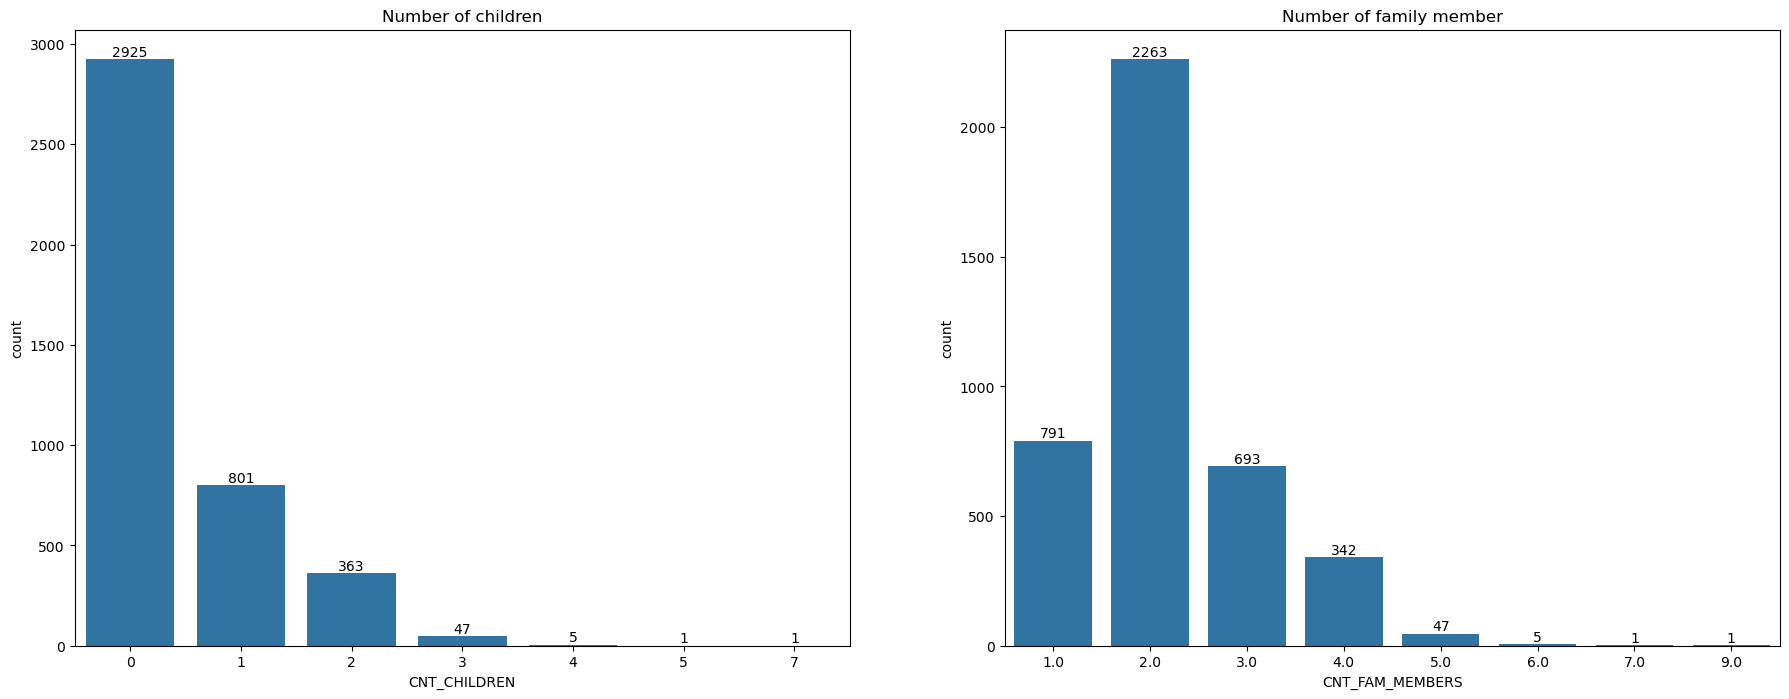

In [206]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
cplot = sns.countplot(data=df_labeled, x="CNT_CHILDREN", ax=ax[0],color='tab:Blue')
for container in cplot.containers:
    cplot.bar_label(container)
ax[0].set_title('Number of children')    
    
cplot = sns.countplot(data=df_labeled, x="CNT_FAM_MEMBERS", ax=ax[1],color='tab:Blue')
for container in cplot.containers:
    cplot.bar_label(container)
ax[1].set_title('Number of family member') 

Text(0.5, 1.0, 'A chart showing the number of children and family members')

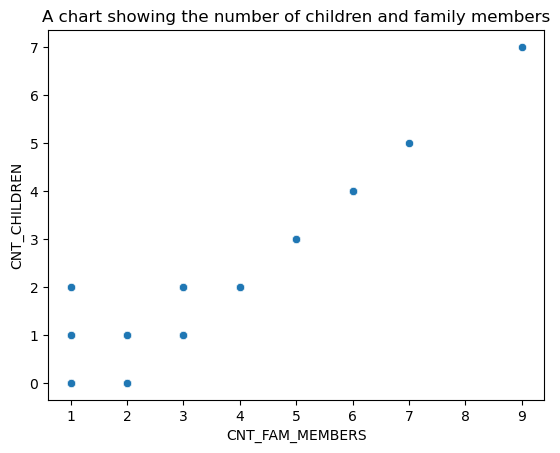

In [207]:
sns.scatterplot(data=df_labeled, x="CNT_FAM_MEMBERS",y="CNT_CHILDREN")
plt.title('A chart showing the number of children and family members')

In [208]:
df_labeled[["CNT_CHILDREN","CNT_FAM_MEMBERS"]].corr()

,CNT_CHILDREN,CNT_FAM_MEMBERS
CNT_CHILDREN,1.000000,0.882908
CNT_FAM_MEMBERS,0.882908,1.000000


In [209]:
df_labeled = df_labeled.drop("CNT_CHILDREN",axis=1)

In [210]:
df_labeled["CNT_FAM_MEMBERS"].value_counts(normalize=True)*100

CNT_FAM_MEMBERS
2.0    54.622254
1.0    19.092445
3.0    16.727009
4.0     8.254888
5.0     1.134444
6.0     0.120685
9.0     0.024137
7.0     0.024137
Name: proportion, dtype: float64

In [211]:
[WOE, IV] = WOE_cal(df_labeled,"CNT_FAM_MEMBERS")
print("Value of Information(IV):", IV)
WOE.sort_values("WOE")

Value of Information(IV): inf


,Dist_bad,Dist_good,WOE
CNT_FAM_MEMBERS,,,
5.0,0.022472,0.011100,-0.705308
1.0,0.269663,0.189196,-0.354390
3.0,0.168539,0.167242,-0.007726
2.0,0.494382,0.547361,0.101799
4.0,0.044944,0.083374,0.617929
6.0,0.000000,0.001233,inf
7.0,0.000000,0.000247,inf
9.0,0.000000,0.000247,inf


In [212]:
def gen_bin_fam(df):
    # return group assigned for bin size = binSize
    # assign data > binOver to the last group
    binSize = 1
    binOver = 5
    if df < binOver:
        return str(math.ceil(df/binSize))
    else:
        return str(math.ceil(binOver/binSize))

In [213]:
df_labeled["FAM_GROUP"] = df_labeled["CNT_FAM_MEMBERS"].apply(gen_bin_fam)
df_labeled["FAM_GROUP"] = df_labeled["FAM_GROUP"].astype('object')

In [214]:
df_labeled= df_labeled.drop("CNT_FAM_MEMBERS",axis=1)

Text(0.5, 1.0, "Each group's percentage of unsatisfied customers")

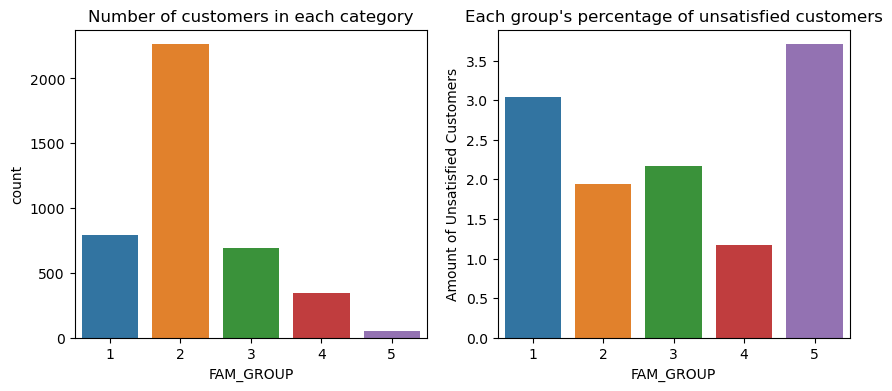

In [215]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))
RowPlot = "FAM_GROUP"
sns.countplot(data=df_labeled, x=RowPlot,ax=ax[0],order=['1','2','3','4','5'])
ax[0].set_title("Number of customers in each category")

df_fam_percent_bad = df_labeled[[RowPlot,"Bad_Customer"]].groupby(RowPlot,as_index=False).mean()
df_fam_percent_bad["Bad_Customer"] = df_fam_percent_bad["Bad_Customer"]*100
sns.barplot(data=df_fam_percent_bad, x=RowPlot, y="Bad_Customer", ax=ax[1])
plt.ylabel("Amount of Unsatisfied Customers")
ax[1].set_title("Each group's percentage of unsatisfied customers")

Research question:"How can machine learning algorithms be effectively utilized to predict credit card approval based on customer attributes and financial behavior?"

In [216]:
[WOE, IV] = WOE_cal(df_labeled,"FAM_GROUP")
print("Value of Information (IV):", IV)
WOE.sort_values("WOE")

Value of Information (IV): 0.06307555859223359


,Dist_bad,Dist_good,WOE
FAM_GROUP,,,
5,0.022472,0.012827,-0.560726
1,0.269663,0.189196,-0.354390
3,0.168539,0.167242,-0.007726
2,0.494382,0.547361,0.101799
4,0.044944,0.083374,0.617929


<Axes: xlabel='AGE', ylabel='Count'>

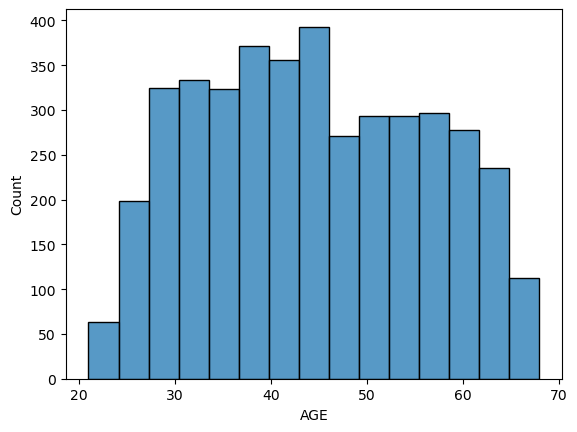

In [217]:
sns.histplot(data=df_labeled, x="AGE",bins=15)

In [218]:
def gen_bin_age(df):
   #assigned return group for bin size = binSize
    # Assign data to the last group > binOver 
    binSize = 5
    binOver = 65
    binMin = 25
    if df <= binMin:
        return str(1)
    elif df <= binOver:
        return str(math.ceil((df-binMin)/binSize))
    else:
        return str(math.ceil((binOver-binMin)/binSize))

In [219]:
df_labeled["AGE_GROUP"] = df_labeled["AGE"].apply(gen_bin_age)
df_labeled["AGE_GROUP"] = df_labeled["AGE_GROUP"].astype('object')

In [220]:
df_labeled= df_labeled.drop("AGE",axis=1)

Text(0.5, 1.0, 'Percentage of Bad Customer in each group')

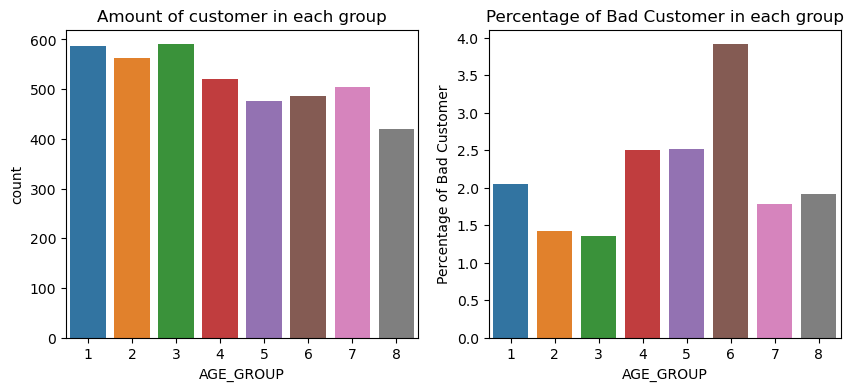

In [221]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))
RowPlot = "AGE_GROUP"
sns.countplot(data=df_labeled, x=RowPlot,ax=ax[0],order=map(str,range(1,9)))
ax[0].set_title("Amount of customer in each group")

df_fam_percent_bad = df_labeled[[RowPlot,"Bad_Customer"]].groupby(RowPlot,as_index=False).mean()
df_fam_percent_bad["Bad_Customer"] = df_fam_percent_bad["Bad_Customer"]*100
sns.barplot(data=df_fam_percent_bad, x=RowPlot, y="Bad_Customer", ax=ax[1],order=map(str,range(1,9)))
plt.ylabel("Percentage of Bad Customer")
ax[1].set_title("Percentage of Bad Customer in each group")

In [222]:
[WOE, IV] = WOE_cal(df_labeled,"AGE_GROUP")
print("Value of Information (IV):", IV)
WOE

Value of Information (IV): 0.11762678798419732


,Dist_bad,Dist_good,WOE
AGE_GROUP,,,
1,0.134831,0.141589,0.048900
2,0.089888,0.136655,0.418900
3,0.089888,0.143562,0.468206
4,0.146067,0.125062,-0.155261
5,0.134831,0.114455,-0.163845
6,0.213483,0.115195,-0.616933
7,0.101124,0.122102,0.188510
8,0.089888,0.101381,0.120329


<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

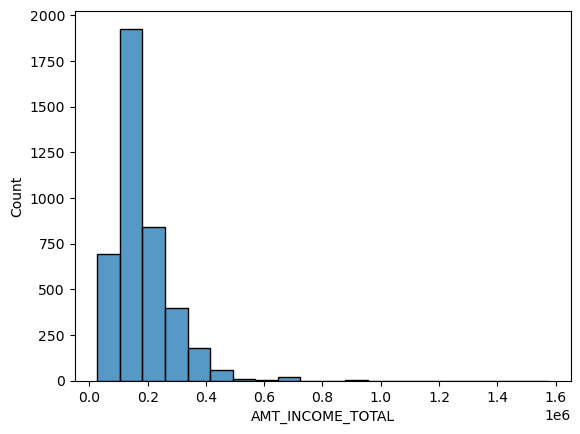

In [223]:
sns.histplot(data=df_labeled, x="AMT_INCOME_TOTAL",bins=20)

In [224]:
def gen_bin_income(df):
    # return group assigned for bin size = binSize
    # assign data > binOver to the last group
    binSize =40000
    binOver = 320000
    binMin = 80000
    if df <= binMin:
        return str(1)
    elif df <= binOver:
        return str(math.ceil((df-binMin)/binSize))
    else:
        return str(math.ceil((binOver-binMin)/binSize))


In [225]:
df_labeled["AMT_INCOME_TOTAL_GROUP"] = df_labeled["AMT_INCOME_TOTAL"].apply(gen_bin_income)
df_labeled["AMT_INCOME_TOTAL_GROUP"] = df_labeled["AMT_INCOME_TOTAL_GROUP"].astype('object')
df_labeled= df_labeled.drop("AMT_INCOME_TOTAL",axis=1)

Text(0.5, 1.0, 'Percentage of Bad Customer in each group')

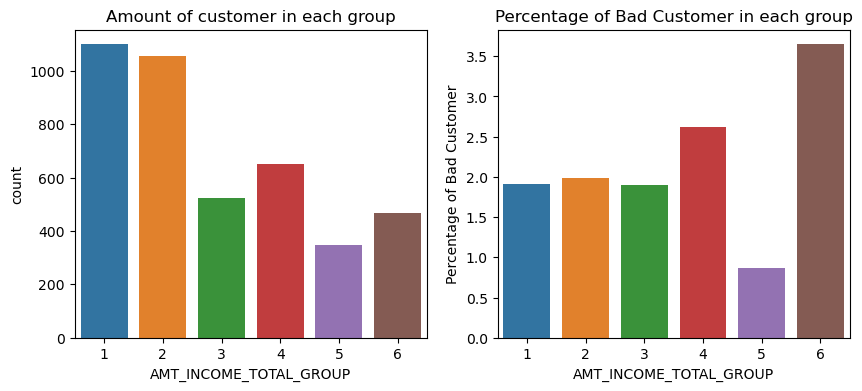

In [226]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))
RowPlot = "AMT_INCOME_TOTAL_GROUP"
sns.countplot(data=df_labeled, x=RowPlot,ax=ax[0],order=['1','2','3','4','5','6'])
ax[0].set_title("Amount of customer in each group")

df_fam_percent_bad = df_labeled[[RowPlot,"Bad_Customer"]].groupby(RowPlot,as_index=False).mean()
df_fam_percent_bad["Bad_Customer"] = df_fam_percent_bad["Bad_Customer"]*100
sns.barplot(data=df_fam_percent_bad, x=RowPlot, y="Bad_Customer", ax=ax[1])
plt.ylabel("Percentage of Bad Customer")
ax[1].set_title("Percentage of Bad Customer in each group")

In [227]:
[WOE, IV] = WOE_cal(df_labeled,"AMT_INCOME_TOTAL_GROUP")
print("Value of Information (IV):", IV)
WOE

Value of Information (IV): 0.10537685224854373


,Dist_bad,Dist_good,WOE
AMT_INCOME_TOTAL_GROUP,,,
1,0.235955,0.265910,0.119517
2,0.235955,0.255303,0.078811
3,0.112360,0.127035,0.122759
4,0.191011,0.155895,-0.203147
5,0.033708,0.085101,0.926109
6,0.191011,0.110755,-0.545013


<Axes: xlabel='count', ylabel='YEAR_EMPLOYED'>

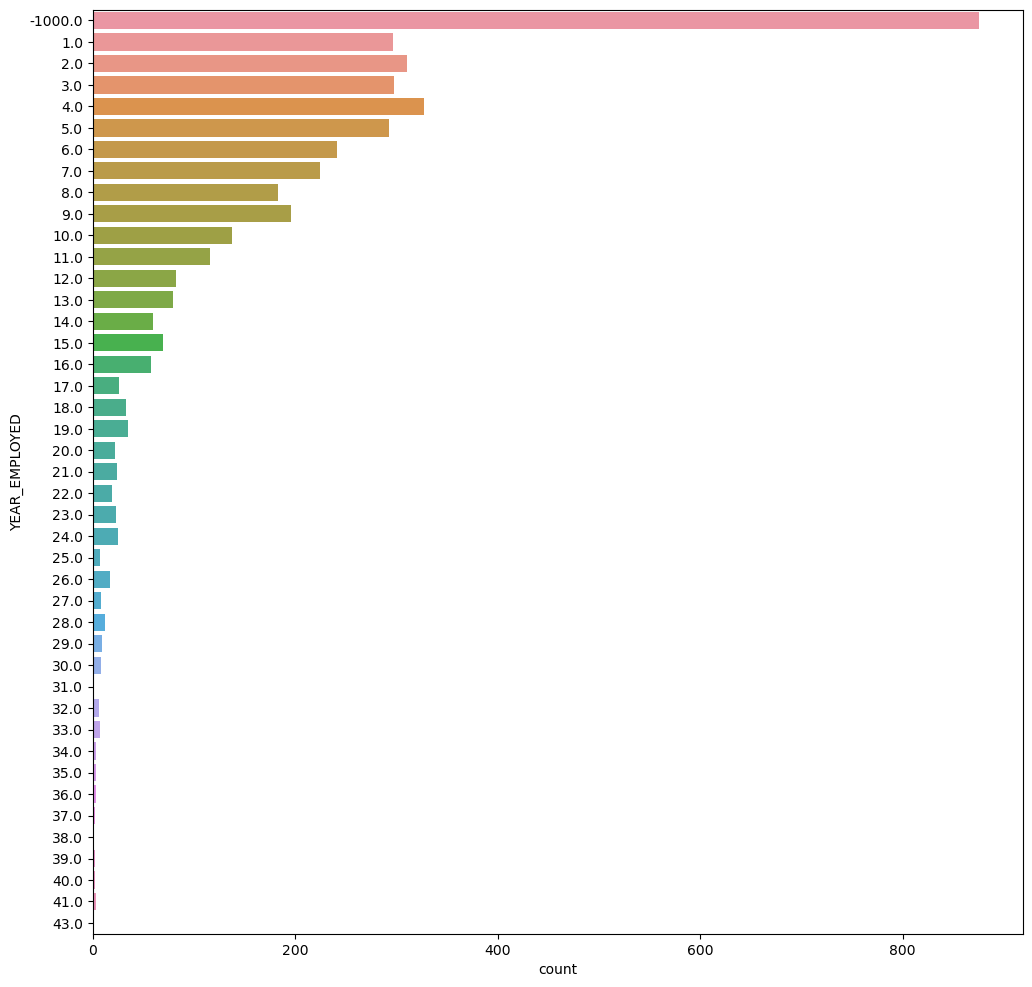

In [228]:
# Display data distribution
fig, ax = plt.subplots(figsize=(12, 12))
sns.countplot(data=df_labeled,y="YEAR_EMPLOYED")

<Axes: xlabel='Bad_Customer', ylabel='YEAR_EMPLOYED'>

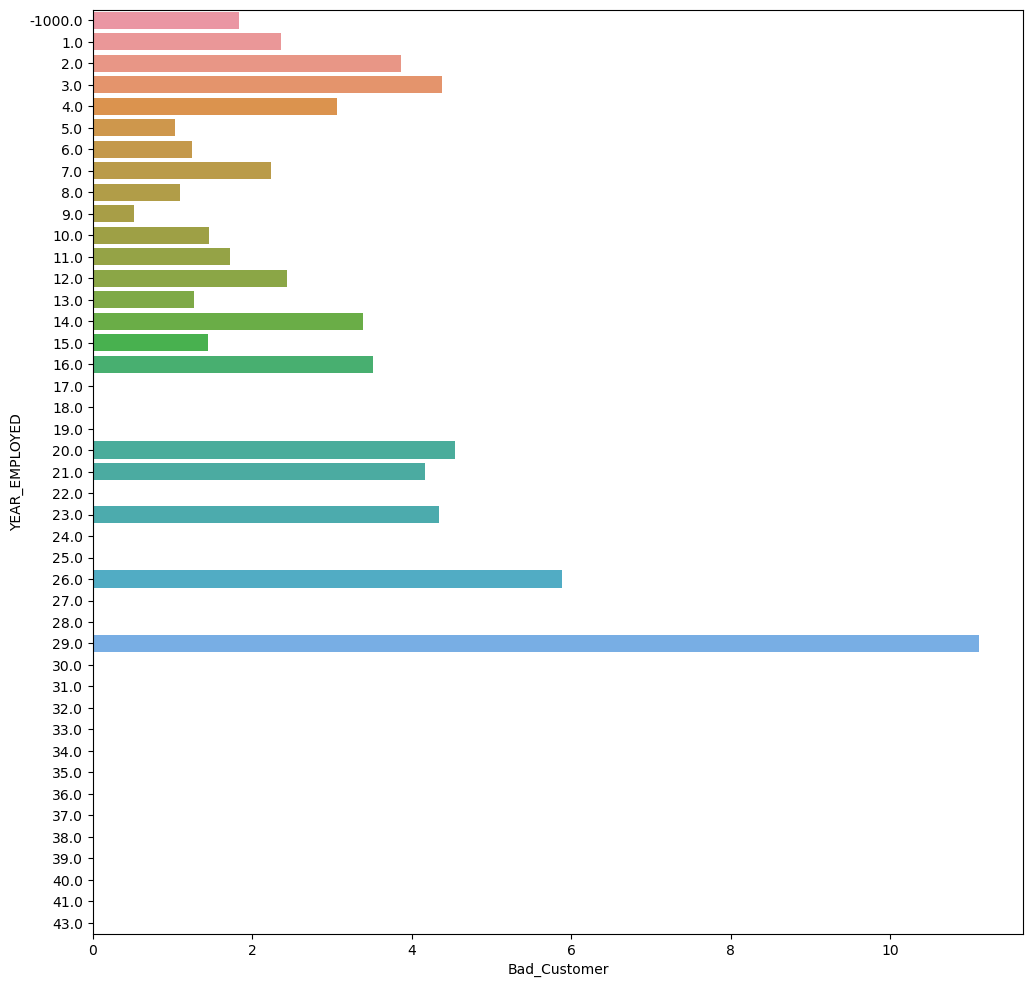

In [229]:
# Bad customer percentage for each year of employment
fig, ax = plt.subplots(figsize=(12, 12))
df_year_percent_bad = df_labeled[["YEAR_EMPLOYED","Bad_Customer"]].groupby("YEAR_EMPLOYED",as_index=False).mean()
df_year_percent_bad["Bad_Customer"] = df_year_percent_bad["Bad_Customer"]*100
sns.barplot(data=df_year_percent_bad, y="YEAR_EMPLOYED", x="Bad_Customer",orient='h')


In [230]:
def gen_bin_year(df):
#assigned return group for bin size = binSize
    # Assign data to the last group > binOver
    binSize = 2
    binOver = 16
    if df == -1000:
        return str(1)
    elif df <= binOver:
        return str(math.ceil(df/binSize) + 1)
    else:
        return str(math.ceil(binOver/binSize) + 1)

In [231]:
df_labeled["YEAR_EMPLOYED_GROUP"] = df_labeled["YEAR_EMPLOYED"].apply(gen_bin_year)


Text(0.5, 1.0, 'Percentage of Bad Customer in each group')

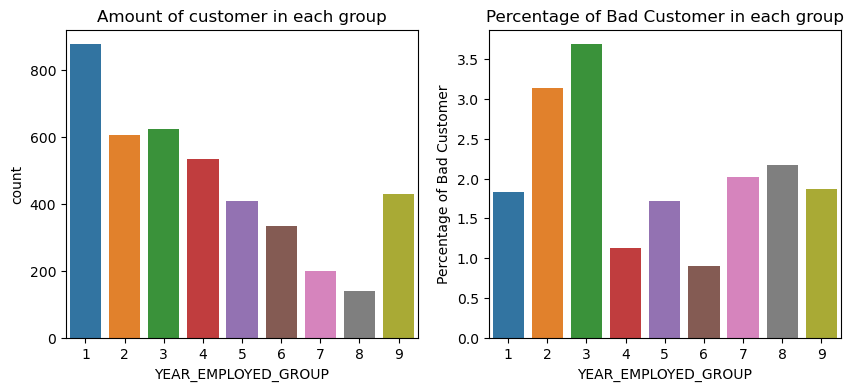

In [232]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))
RowPlot = "YEAR_EMPLOYED_GROUP"
sns.countplot(data=df_labeled, x=RowPlot,ax=ax[0],order=map(str,range(1,10)))
ax[0].set_title("Amount of customer in each group")

df_fam_percent_bad = df_labeled[[RowPlot,"Bad_Customer"]].groupby(RowPlot,as_index=False).mean()
df_fam_percent_bad["Bad_Customer"] = df_fam_percent_bad["Bad_Customer"]*100
sns.barplot(data=df_fam_percent_bad, x=RowPlot, y="Bad_Customer", ax=ax[1])
plt.ylabel("Percentage of Bad Customer")
ax[1].set_title("Percentage of Bad Customer in each group")

In [233]:
[WOE, IV] = WOE_cal(df_labeled,"YEAR_EMPLOYED_GROUP")
print("Value of Information (IV):", IV)
WOE

Value of Information (IV): 0.18326788992276247


,Dist_bad,Dist_good,WOE
YEAR_EMPLOYED_GROUP,,,
1,0.179775,0.211889,0.164357
2,0.213483,0.144795,-0.388237
3,0.258427,0.148249,-0.555722
4,0.067416,0.130242,0.658514
5,0.078652,0.098668,0.226731
6,0.033708,0.081401,0.881657
7,0.044944,0.047854,0.062741
8,0.033708,0.033300,-0.012160
9,0.089888,0.103601,0.141990


In [234]:
df_labeled= df_labeled.drop("YEAR_EMPLOYED",axis=1)
df_labeled["YEAR_EMPLOYED_GROUP"] = df_labeled["YEAR_EMPLOYED_GROUP"].astype('object')

In [235]:
df_labeled.head()

,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,Bad_Customer,FAM_GROUP,AGE_GROUP,AMT_INCOME_TOTAL_GROUP,YEAR_EMPLOYED_GROUP
0,Working,Civil marriage,G5,0,2,3,1,8
1,Pensioner,Married,G4,0,2,6,1,1
2,Working,Married,G5,0,2,3,1,2
3,Pensioner,Married,G4,0,2,8,1,1
4,Pensioner,Single / not married,G4,0,1,7,1,1


In [236]:
df_labeled["Bad_Customer"].value_counts(normalize=True)*100

Bad_Customer
0    97.851798
1     2.148202
Name: proportion, dtype: float64

In [237]:
df_LogReg_one = df_labeled
x_LogReg = df_LogReg_one.drop("Bad_Customer",axis=1)
y_LogReg = df_LogReg_one["Bad_Customer"]
x_LogReg_train, x_LogReg_test, y_LogReg_train, y_LogReg_test = train_test_split(x_LogReg, y_LogReg, test_size=0.25, stratify=y_LogReg, random_state=42)

In [238]:
x_LogReg_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 2861 to 1167
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME_INCOME_TYPE        3107 non-null   object
 1   NAME_FAMILY_STATUS      3107 non-null   object
 2   OCCUPATION_TYPE         3107 non-null   object
 3   FAM_GROUP               3107 non-null   object
 4   AGE_GROUP               3107 non-null   object
 5   AMT_INCOME_TOTAL_GROUP  3107 non-null   object
 6   YEAR_EMPLOYED_GROUP     3107 non-null   object
dtypes: object(7)
memory usage: 194.2+ KB


In [239]:
x_train_balance,y_train_balance = SMOTEN(random_state=10).fit_resample(x_LogReg_train,y_LogReg_train)
x_LogReg_train_encoded = pd.get_dummies(x_train_balance)
x_LogReg_test_encoded = pd.get_dummies(x_LogReg_test)


In [240]:
x_LogReg_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   NAME_INCOME_TYPE_Commercial associate    6080 non-null   bool 
 1   NAME_INCOME_TYPE_Pensioner               6080 non-null   bool 
 2   NAME_INCOME_TYPE_State servant           6080 non-null   bool 
 3   NAME_INCOME_TYPE_Working                 6080 non-null   bool 
 4   NAME_FAMILY_STATUS_Civil marriage        6080 non-null   bool 
 5   NAME_FAMILY_STATUS_Married               6080 non-null   bool 
 6   NAME_FAMILY_STATUS_Separated/Widow       6080 non-null   bool 
 7   NAME_FAMILY_STATUS_Single / not married  6080 non-null   bool 
 8   OCCUPATION_TYPE_G1                       6080 non-null   bool 
 9   OCCUPATION_TYPE_G2                       6080 non-null   bool 
 10  OCCUPATION_TYPE_G3                       6080 non-null   bool 
 11  OCCU

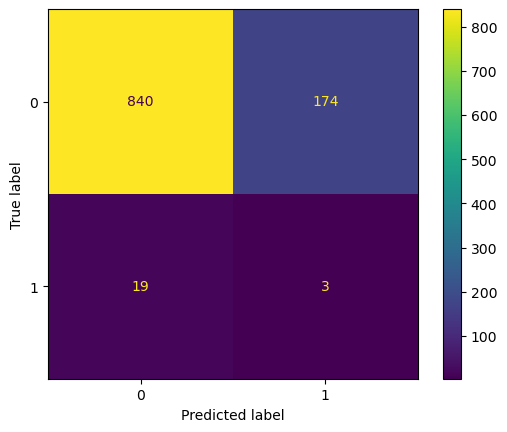

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1014
           1       0.02      0.14      0.03        22

    accuracy                           0.81      1036
   macro avg       0.50      0.48      0.46      1036
weighted avg       0.96      0.81      0.88      1036



In [241]:
log_clf = LogisticRegression(random_state=42, max_iter=2000).fit(x_LogReg_train_encoded, y_train_balance)
y_predict= log_clf.predict(x_LogReg_test_encoded)
log_cm = confusion_matrix(y_LogReg_test, y_predict, labels=log_clf.classes_)

# Make a confusion matrix display
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Matrix of plot confusion
log_disp.plot(values_format='')

#Plot display
plt.show()
print(classification_report(y_LogReg_test,y_predict))
y_pred_log = y_predict.copy()

In [242]:
cv_params = {'n_estimators' : [50,100,200], 
              'max_depth' : [10,20,50],
              'min_samples_leaf':[1,5,10]}
rf = RandomForestClassifier(random_state=0)
rf_val = GridSearchCV(rf, cv_params, refit='f1')
rf_val.fit(x_LogReg_train_encoded, y_train_balance)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 20, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='f1')

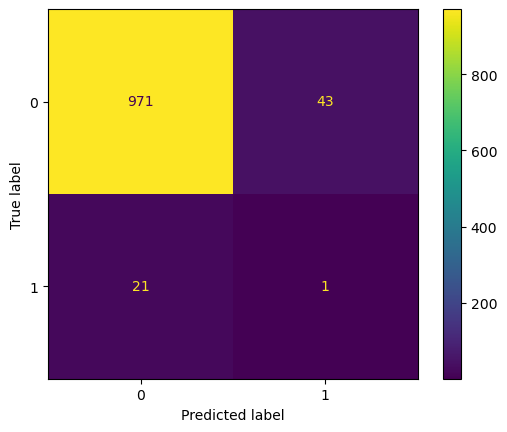

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1014
           1       0.02      0.05      0.03        22

    accuracy                           0.94      1036
   macro avg       0.50      0.50      0.50      1036
weighted avg       0.96      0.94      0.95      1036



In [243]:
y_predict = rf_val.predict(x_LogReg_test_encoded)
log_cm = confusion_matrix(y_LogReg_test, y_predict, labels=log_clf.classes_)

# Make a confusion matrix display
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)
# Matrix of plot confusion
log_disp.plot(values_format='')

# plot display
plt.show()
print(classification_report(y_LogReg_test,y_predict))
y_pred_rf = y_predict.copy()

In [245]:
cv_params = {'max_depth': [4, 6, 8],
              'min_child_weight': [1, 3, 5],
              'learning_rate': [0.1, 0.3, 0.5],
              'n_estimators': [50, 100, 200],
              }
scoring = 'f1'

In [246]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring=scoring,
                      cv=5,
                      refit='f1'
                      )


In [247]:
xgb_cv = xgb_cv.fit(x_LogReg_train_encoded, y_train_balance)
xgb_cv

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [4, 6, 8], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200]},
             refit='f1', scoring='f1')

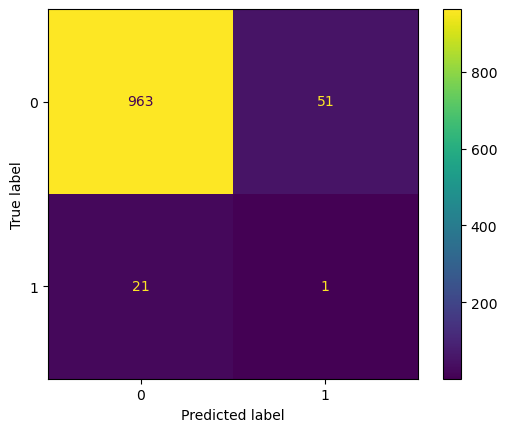

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1014
           1       0.02      0.05      0.03        22

    accuracy                           0.93      1036
   macro avg       0.50      0.50      0.50      1036
weighted avg       0.96      0.93      0.94      1036



In [248]:
y_predict = xgb_cv.predict(x_LogReg_test_encoded)
log_cm = confusion_matrix(y_LogReg_test, y_predict, labels=log_clf.classes_)

# Make a confusion matrix display
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Matrix of plot confusion
log_disp.plot(values_format='')

# Plot Display
plt.show()
print(classification_report(y_LogReg_test,y_predict))
y_pred_xg = y_predict.copy()

RESULTS:Model Evaluation Overview:​

Logistic Regression, Random Forest, and XGBoost were evaluated for credit approval prediction.​

Each model provided nuanced perspectives on accuracy and efficacy.​

Logistic Regression's Attributes:​

Fundamental in binary classification, showcasing simplicity and interpretability.​

Suitable for scenarios where transparency in decision-making is crucial.​

Random Forest's Robustness:​

Leverages an ensemble of decision trees, demonstrating robustness in capturing complex data relationships.​

Offers a higher level of predictive accuracy compared to Logistic Regression.​

XGBoost's Superior Performance:​

Gradient-boosting algorithm that sequentially improves upon weaknesses of preceding models.​

Often excels in predictive tasks, showcasing superior performance.​

CONCLUSIONS:​


The model offers valuable insights for financial institutions to enhance their credit approval processes.​

Continuous monitoring and refinement of the model are crucial to adapt to evolving market conditions and changes in customer behavior.​

The model provides a foundation for data-driven decision-making, aiding in more objective and consistent credit assessments.

REFERENCES: 
[1]https://www.kaggle.com/code/wisartthongyoy/credit-card-approval-prediction
[2]Peiris, M. P. C. (2022). Credit Card Approval Prediction by Using Machine Learning Techniques (Doctoral dissertation).
[3]Arora, S., Bindra, S., Singh, S., & Nassa, V. K. (2022). Prediction of credit card defaults through data analysis and machine learning techniques. Materials Today: Proceedings, 51, 110-117.
[4]Janapareddy, D., & Yenduri, N. C. (2023). Credit Card Approval Prediction: A comparative analysis between logistic regressionclassifier, random forest classifier, support vectorclassifier with ensemble bagging classifier.
[5]Faisal, M. F., Saqlain, M. N. U., Bhuiyan, M. A. S., Miraz, M. H., & Patwary, M. J. (2021, December). Credit approval system using machine learning: Challenges and future directions. In 2021 International Conference on Computing, Networking, Telecommunications & Engineering Sciences Applications (CoNTESA) (pp. 76-82). IEEE.